# Laboratorio 12: Random Forest 

## Dayana Andrea Henao Arbeláez 

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import numpy as np

1. Cargar load digitis
```
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)

import matplotlib.pyplot as plt
plt.gray()
plt.matshow(digits.images[95])
plt.show()
```


(1797, 64)


<Figure size 640x480 with 0 Axes>

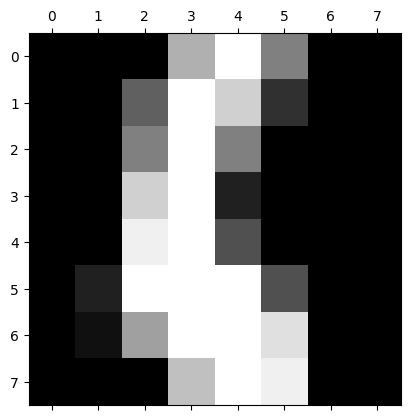

In [40]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)

import matplotlib.pyplot as plt
plt.gray()
plt.matshow(digits.images[95])
plt.show()

In [41]:
digits = load_digits(n_class=6)
X, y = digits.data, digits.target
n_samples, n_features = X.shape

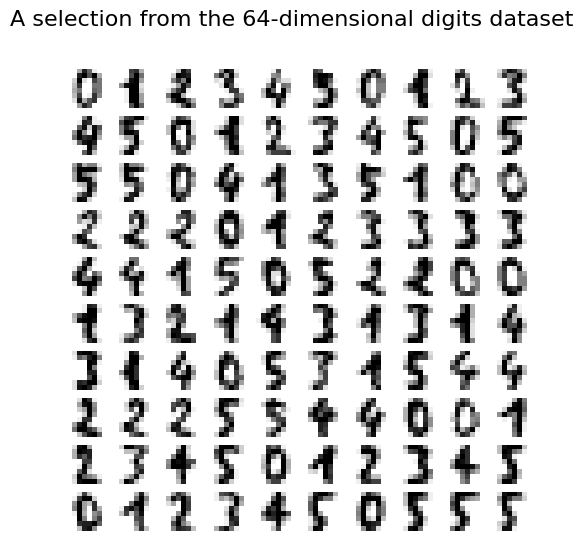

In [42]:
fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(6, 6))
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(X[idx].reshape((8, 8)), cmap=plt.cm.binary)
    ax.axis("off")
_ = fig.suptitle("A selection from the 64-dimensional digits dataset", fontsize=16)

2. Aplicar Random Forest usando sklearn.

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Búsqueda de los mejores hiperparámetros con GridSearchCV

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train, y_train)
print("Mejores hiperparámetros:", grid.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Mejores hiperparámetros: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}


In [44]:
modelo = RandomForestClassifier(
    n_estimators=500,
    max_depth=None,       
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

modelo.fit(X_train, y_train)
y_pred=modelo.predict(X_test)

In [45]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))

Accuracy: 0.9953917050691244
Matriz de confusión:
 [[39  0  0  0  0  0]
 [ 0 33  0  0  0  0]
 [ 0  0 39  0  0  0]
 [ 0  1  0 39  0  0]
 [ 0  0  0  0 39  0]
 [ 0  0  0  0  0 27]]
Reporte de clasificación:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       0.97      1.00      0.99        33
           2       1.00      1.00      1.00        39
           3       1.00      0.97      0.99        40
           4       1.00      1.00      1.00        39
           5       1.00      1.00      1.00        27

    accuracy                           1.00       217
   macro avg       1.00      1.00      1.00       217
weighted avg       1.00      1.00      1.00       217



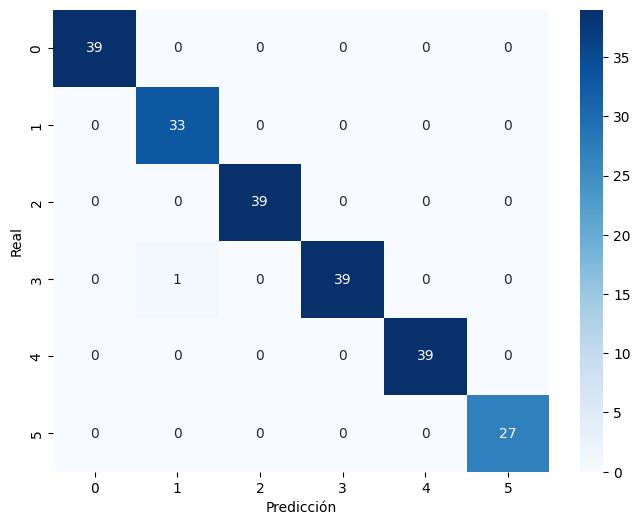

In [46]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = modelo.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()


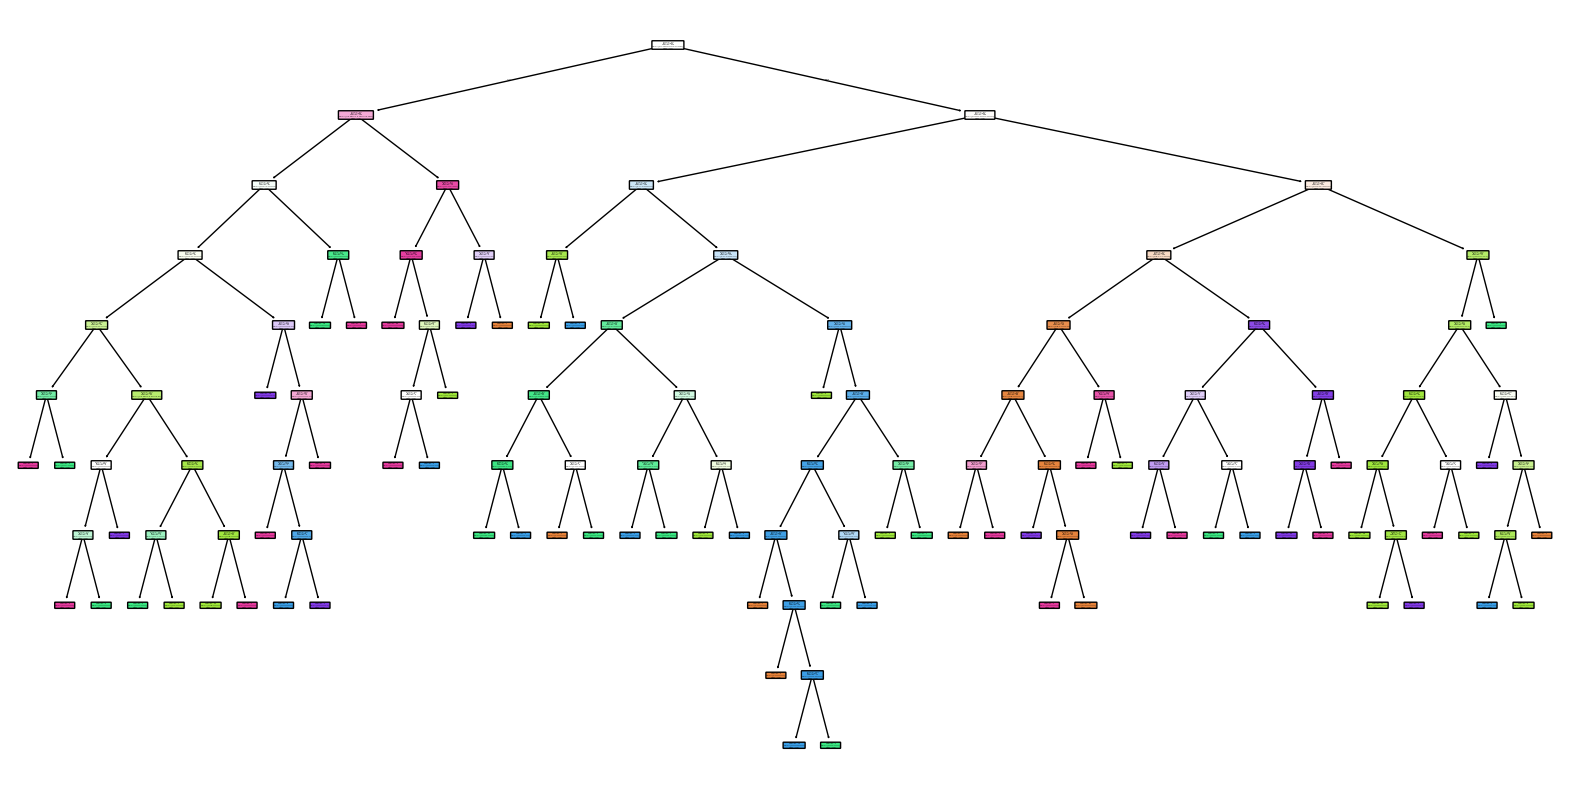

In [47]:
# Para graficar el primer arbol del Random Forest
from sklearn.tree import plot_tree
arbol = modelo.estimators_[0]   # el primer árbol del bosque
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
tree.plot_tree(arbol, 
               filled=True, 
               feature_names=None, 
               class_names=True, 
               rounded=True)
plt.show()


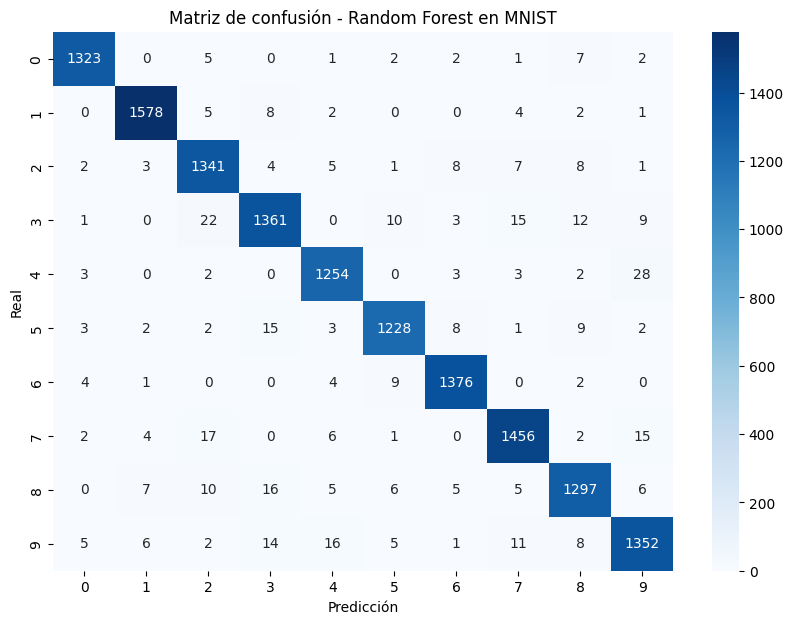

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1343
           1       0.99      0.99      0.99      1600
           2       0.95      0.97      0.96      1380
           3       0.96      0.95      0.95      1433
           4       0.97      0.97      0.97      1295
           5       0.97      0.96      0.97      1273
           6       0.98      0.99      0.98      1396
           7       0.97      0.97      0.97      1503
           8       0.96      0.96      0.96      1357
           9       0.95      0.95      0.95      1420

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000

Cross-validation accuracy: [0.96603632 0.96887556 0.96748098]
Promedio: 0.9674642860124187
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Mejores parámetros: {'max_depth': 40, 'max_features': 'sqrt', 'n_estimators': 300}
Mejor 

In [32]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset MNIST
mnist = fetch_openml('mnist_784', as_frame=False)
X, y = mnist["data"], mnist["target"].astype(int)   # convertir etiquetas a enteros

# División train/test 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

# Entrenar un Random Forest
modelo = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    max_features='sqrt',
    max_depth=40,   
    n_jobs=-1
)
modelo.fit(X_train, y_train)

# Predicción
y_pred = modelo.predict(X_test)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de confusión - Random Forest en MNIST")
plt.show()

# Reporte completo
print(classification_report(y_test, y_pred))

# Validación cruzada (en el set de entrenamiento)
scores = cross_val_score(modelo, X_train, y_train, cv=3, scoring="accuracy", n_jobs=-1)
print("Cross-validation accuracy:", scores)
print("Promedio:", scores.mean())

# Grid Search para clasificación
param_grid = {
    'n_estimators': [100, 300],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [None, 20, 40],
}

grid = GridSearchCV(
    RandomForestClassifier(random_state=42, n_jobs=-1),
    param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train, y_train)

print("Mejores parámetros:", grid.best_params_)
print("Mejor accuracy:", grid.best_score_)


